In [1]:
import matplotlib.pyplot as plt
import nivapy3 as nivapy
import pandas as pd

plt.style.use("ggplot")

# Accessing data using NVE's Hydrological API (HydApi)

NVE's [Hydrological API](https://hydapi.nve.no/UserDocumentation/#gettingstarted) provides access to historical and real-time hydrological time series. NivaPy's "data access" (`.da`) module includes functions designed to make it easier to access data using this service.

## Creating an API key

To use HydApi, you must first [register](https://hydapi.nve.no/Users) and create an API key. Once you have a key, create a new file in your `HOME` directory (i.e. the top level of your JupyterHub filespace) to store it. The file should be named `.nve-hydapi-key` (note the `.` at the start, which makes this a "hidden" file in JupyterLab; use VSCode if you wish to see it listed in the file browser). The file must have the following structure:

    [Auth]
    key = your-api-key-here
    
Functions within NivaPy will automatically look for this file and attempt to authenticate whenever you make API requests. Alternatively, it is possible (but not recommended) to pass your API key directly in your function calls. This works, but is not very secure: for example, it would be easy to accidentally commit code containing your API key to GitHub, making it available to other users.

## List available parameters

NVE's API uses numeric codes to identify parameters. Use the function below to find the parameter ID(s) for your variables of interest.

In [2]:
# List all available parameters
par_df = nivapy.da.get_nve_hydapi_parameters()
par_df

,parameter,parameterName,parameterNameEng,unit
0,0,Nedbør,Precipitation,mm
1,1000,Vannstand,Stage,m
2,1001,Vannføring,Discharge,m³/s
3,1002,Vannhastighet,Water speed,m/s
4,1003,Vanntemperatur,Water temperature,°C
5,1004,Magasinvolum,Reservoir volume,millioner m³
6,1006,Ledningsevne,Conductivity,µS/cm
7,1007,pH,pH,pH
8,1012,Overvannstand kraftverk,Head water level-hydropow.,m
9,1200,Konsentrasjon suspendert min. materiale,Concentration suspended (inorg.) sedim.,mg/l


## List available stations

The API provides detailed summary information for each location.

In [3]:
# List all stations
stn_df = nivapy.da.get_nve_hydapi_stations()
print(len(stn_df), "stations available.")
stn_df.head()

1867 stations available.


,station_id,station_name,latitude,longitude,utmEast_Z33,utmNorth_Z33,masl,riverName,councilNumber,councilName,...,culQ5,culQ10,culQ20,culQ50,culHm,culH5,culH10,culH20,culH50,seriesList
0,1.15.0,Femsjø,59.13015,11.48516,298887,6559841,81,Haldenvassdraget,3101,Halden,...,NaN,NaN,NaN,NaN,79.5405,79.6792,79.8333,80.0008,80.2505,"[{'parameterName': 'Vannstand', 'parameter': 1..."
1,1.200.0,Lierelv,59.92038,11.53180,306146,6647624,134,Haldenvassdraget,3226,Aurskog-Høland,...,32.6537,34.9251,36.4982,37.9152,2.2229,2.3076,2.3381,2.3585,2.3764,"[{'parameterName': 'Vannstand', 'parameter': 1..."
2,1.41.0,Lognselva,59.80011,11.44331,300484,6634505,148,Haldenvassdraget,3226,Aurskog-Høland,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'parameterName': 'Vannstand', 'parameter': 1..."
3,1.42.0,Øymarksjø,59.33290,11.63712,308715,6581952,109,Haldenvassdraget,3124,Aremark,...,NaN,NaN,NaN,NaN,108.7322,108.9479,109.1339,109.3167,109.5600,"[{'parameterName': 'Vannstand', 'parameter': 1..."
4,1.43.0,Aspern og Ara,59.14667,11.69273,310848,6561073,106,Haldenvassdraget,3124,Aremark,...,NaN,NaN,NaN,NaN,106.0580,106.1420,106.2917,106.4808,106.8153,"[{'parameterName': 'Vannstand', 'parameter': 1..."


You can also use the `quickmap` function in `nivapy.spatial` to explore station locations.

In [4]:
# Map all stations
nivapy.spatial.quickmap(
    stn_df, cluster=True, kartverket=True, aerial_imagery=True, popup="station_id"
)

## Get hydrological data

Once you have identified your parameters and stations of interest, query the data as shown below. Multiple station and parameters combinations can be queried simultaneously. See the function docstring for further details and options.

In [5]:
# Define stations, parameters and time period of interest
stn_ids = ["2.605.0", "234.18.0"]
par_ids = [1001]
st_dt = "2020-01-01"
end_dt = "2021-01-01"

df = nivapy.da.query_nve_hydapi(stn_ids, par_ids, st_dt, end_dt, resolution=1440)

df.head()

,station_id,station_name,parameter,parameter_name,parameter_name_eng,method,datetime,value,unit,correction,quality
0,2.605.0,Solbergfoss,1001,Vannføring,Discharge,Mean,2020-01-01 11:00:00+00:00,673.7500,m³/s,0,2
1,2.605.0,Solbergfoss,1001,Vannføring,Discharge,Mean,2020-01-02 11:00:00+00:00,674.0000,m³/s,0,2
2,2.605.0,Solbergfoss,1001,Vannføring,Discharge,Mean,2020-01-03 11:00:00+00:00,628.0417,m³/s,0,2
3,2.605.0,Solbergfoss,1001,Vannføring,Discharge,Mean,2020-01-04 11:00:00+00:00,578.5625,m³/s,0,2
4,2.605.0,Solbergfoss,1001,Vannføring,Discharge,Mean,2020-01-05 11:00:00+00:00,597.2083,m³/s,0,2


array([<Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>], dtype=object)

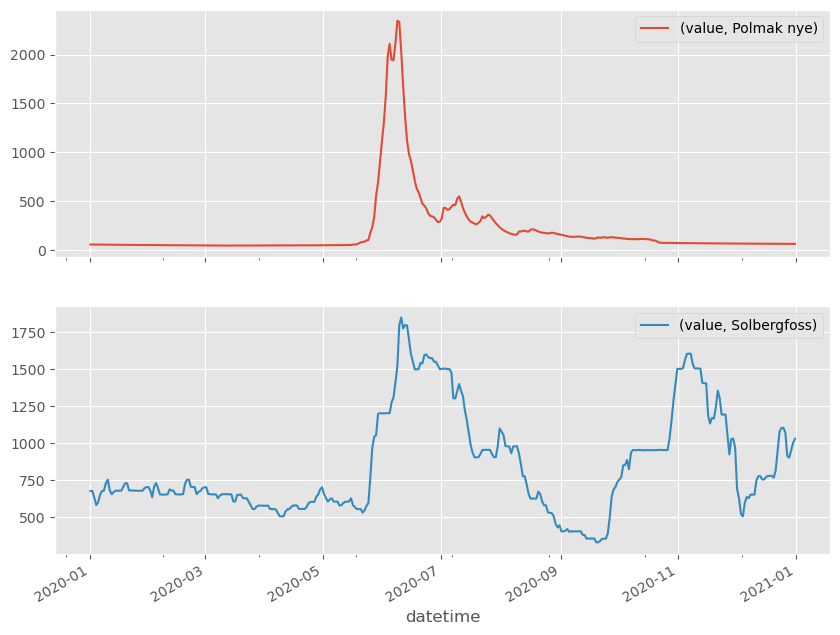

In [6]:
# Unstack
df2 = df[["datetime", "value", "station_name"]]
df2.set_index(["datetime", "station_name"], inplace=True)
df2 = df2.unstack("station_name")

# Plot
df2.plot(subplots=True, sharex=True, figsize=(10, 8))